<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 4: Proceso de Obtención de Datos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 4.1: Exploración, Integración y Limpieza de Datos</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema g: Series de Tiempo Parte 2</center></font></b>
</div>

## SERIES DE TIEMPO

Las **Series de Tiempo** son una importante fuente de información que se emplea para definir estrategias para la toma de decisiones en los negocios. Desde una industria financiera pasando por empresas de ingeniería y educación, las **Series de Tiempo** juegan un rol de suma importancia para comprender muchos detalles de factores específicos que se ven afectados respecto del tiempo. 

Para ejemplificar el uso de las **Series de Tiempo**, se empleará una base de datos que contiene la información de la cantidad de pasajeros que volaron cada mes en cierta línea aérea, en un rango de tiempo que va desde enero de 1949 a diciembre de 1960. Los encabezados de las columnas de información son:

1. **Mes**: Es el mes en formato aaaa-mm.
2. **#Pasajeros**: Es la cantidad de pasajeros que volaron.

Para la lectura del archivo y la preparación de los datos, se realizarán las siguientes operaciones:

1. Importación de las librerías necesarias (**Pandas**, **NumPy** y **Matplotlib**).
2. Definición de los parámetros a emplear en los gráficos de **Matplotlib**.
3. Lectura de los datos empleando el método `.read_csv()`.
4. Mostrar el tipo de datos contenidos en el **DataFrame** empleando el método `.dtypes`.
5. Mostrar el **DataFrame** resultante empleando el método `.head()`.

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (10, 8)}) 

#Lectura de los datos desde el archivo CSV
datos_df = pd.read_csv('./Datos/Pasajeros.csv')

#Impresión de los Resultados
print('Tipos de Datos en el DataFrame:\n', datos_df.dtypes)
print("\nEl DataFrame es:")
datos_df.head(10)

Tipos de Datos en el DataFrame:
 Mes           object
#Pasajeros     int64
dtype: object

El DataFrame es:


,Mes,#Pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


### Descripción de los Datos
Los datos contenidos en el **DataFrame** especifican un año y un mes, así como el número de pasajeros que viajaron en ese mes. Como se puede ver, el tipo de dato para los meses está definido como `object`, por lo mismo se requiere pasarlo a un formato de **Series de Tiempo** y emplear la columna `Mes` como el índice del **DataFrame**. 

Las marcas de tiempo o *Timestamps* son muy útiles en la comparación de objetos. Es posible crear un *Timestamp* con el método `pd.to_datetime()` de **Pandas**. Para ello, será necesario emplear la librería **Datetime** de **Pandas**, la cual se importa por medio de la siguiente instrucción:
```python
from datetime import datetime
```
La documentación del método `pd.to_datetime()` de **Pandas** se puede consultar [en esta liga](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Los *Timestamp* son de gran utilidad cuando se requiere hacer filtrado lógico de datos basados en fechas. Para realizarlo, el método `pd.to_datetime()` llevará como argumento la columna del **DataFrame** que se convertirá al formato de **Series de Tiempo**. 

Finalmente, la columna `Mes` se definirá como el **Indice**.

In [2]:
#Uso de la librería Datetime de Python
from datetime import datetime

#Conversión de la Columna "Month" al formato de Serie de Tiempo
datos_df['Mes'] = pd.to_datetime(datos_df['Mes'])

#Definir la Columna "Month" como el Indice del DataFrame
datos_df.set_index('Mes', inplace = True)

#Revisando el formato de los datos contenidos en el Indice del DataFrame
print('Tipos de Datos en la Columna Mes:\n', datos_df.index)
print("\nEl DataFrame es:")
datos_df.head(10)

Tipos de Datos en la Columna Mes:
 DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Mes', length=144, freq=None)

El DataFrame es:


,#Pasajeros
Mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


Ahora se extraerá la columna `#Pasajeros` como una **Serie**, recordando que a pesar de ser un **DataFrame** de una sola columna (*vector*), el **Indice** se mantiene como parte del mismo.

In [3]:
#Extracción de la columna '#Pasajeros' como una Serie
ts = datos_df['#Pasajeros']

#Impresión de los Resultados
print("\nLa Serie es:")
ts.head(10)


La Serie es:


Mes
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Pasajeros, dtype: int64

### Estacionariedad (Stationarity)
El concepto de **Estacionariedad** (*Stationarity*) es de mucha utilidad en el análisis de **Series de Tiempo**. 

Para poder emplear un modelo de **Series de Tiempo**, es importante que esa **Serie** sea *Estacionaria*, es decir, que sus propiedades estadísticas (**media** y **varianza**) permanezcan constantes en el tiempo. Esto es debido a que el comportamiento de la serie a lo largo del tiempo es constante, y por ello se mantendrá de esa manera en el futuro, lo cual permite hacer pronósticos más certeros.

En la práctica, es posible asumir que una serie es *Estacionaria* si tiene sus propiedades estadísticas constantes en el tiempo, las cuales pueden ser:
* Su valor de **Media** es constante. 
* Su valor de **Varianza** es constante. 
* Tiene un valor de auto-covarianza que no depende del tiempo.

Estos valores pueden ser revisados de manera sencilla en **Python**. Sin embargo, una manera rápida es comprobarlo a través de un gráfico de la **Serie** de datos, para ello se empleará el método `.plot()` de **Matplotlib** aplicado a la **Serie** de tiempo `ts`, esto es:

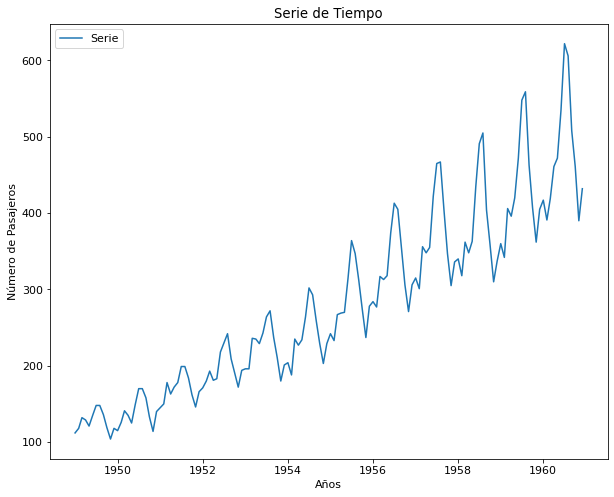

In [4]:
#Gráfico de la Serie de Tiempo
plt.plot(ts, label = 'Serie');
plt.legend(loc='best');
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros');
plt.title('Serie de Tiempo');

Es posible observar en el gráfico que existe un incremento en la tendencia, pero mantiene cierto nivel de **Estacionariedad**.

### Prueba de Estacionariedad
Para realizar la prueba de **Estacionariedad**, se puede emplear la prueba ***Dickey-Fuller*** que está definida a través de la función de **Python** descrita a continuación como `prueba_estacionariedad`.

Para más detalles de la prueba Dickey-Fuller, se puede consultar [este enlace](http://www.real-statistics.com/time-series-analysis/stochastic-processes/dickey-fuller-test/).

In [5]:
#Función para la prueba Dicker-fuller de Estacionariedad
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def prueba_estacionariedad(serie_tiempo):
    
    #Determinación de Estadísticos
    rolmean = serie_tiempo.rolling(12).mean()
    rolstd = serie_tiempo.rolling(12).std()

    #Gráfica de los Estadísticos
    orig = plt.plot(serie_tiempo, color='blue',label='Serie')
    mean = plt.plot(rolmean, color='red', label='Media')
    std = plt.plot(rolstd, color='black', label = 'Desviación Estándar')
    plt.legend(loc='best')
    plt.title('Media y Desviación Estándar de la Serie de Tiempo')
    plt.xlabel('Años')
    plt.ylabel('Número de Pasajeros')
    plt.show()
    
    #Prueba Dickey-Fuller
    print('Resultados de la Prueba Dickey-Fuller de Estacionariedad:\n')
    dftest = adfuller(serie_tiempo, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Prueba Estadística','Valor-p','Número de Retardos','Número de Observaciones'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)

Una vez definida la función `prueba_estacionariedad`, se aplica a la **Serie de Tiempo**:

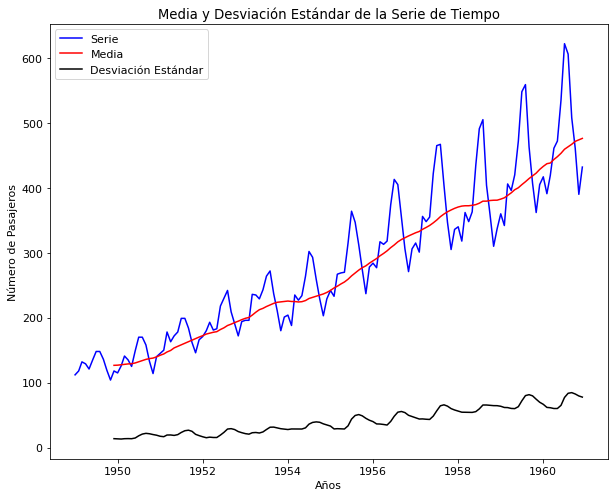

Resultados de la Prueba Dickey-Fuller de Estacionariedad:

Prueba Estadística           0.815369
Valor-p                      0.991880
Número de Retardos          13.000000
Número de Observaciones    130.000000
Valor Crítico (1%)          -3.481682
Valor Crítico (5%)          -2.884042
Valor Crítico (10%)         -2.578770
dtype: float64


In [6]:
#Prueba de Estacionariedad para la Serie
prueba_estacionariedad(ts);

De los resultados, es posible observar que no son *Estacionarios* debido a:
* La **media** se incrementa a pesar de que la **desviación estándar** se mantiene baja.
* El valor *Prueba Estadística* es mayor a los *Valores Críticos*.

***Nota:*** El valor *Prueba Estadística* se compara con los *Valores Críticos* para definir la **Estacionariedad** de la **Serie**:
* Si el valor *Prueba Estadística* es mayor a los *Valores Críticos*, la **Serie** *No es Estacionaria*.
* Si el valor *Prueba Estadística* es menor a alguno de los *Valores Críticos*, la **Serie** *Es Estacionaria* y el porcentaje del *Valor Crítico* define la certeza de ello.


### Conviertiendo la Serie en Estacionaria
Existen dos factores importantes que hacen que una **Serie** sea *No Estacionaria*:
* Tendencia (Trend): La tendencia no tiene valor constante en su **media**.
* Temporalidad (Seasonality): Hay variación en rangos de tiempo específicos.

La idea es modelar la Tendencia y la Temporalidad en esta **Serie**, para con ello remover esas constantes y obtener una **Serie** *Estacionaria*. De esa manera es posible realizar pronósticos con un mayor nivel de confianza, para finalmente volver a aplicar las constantes de Tendencia y Temporalidad que previamente se había eliminado.

El primer paso es reducir la Tendencia por medio de una transformación, para este caso se tuvo una Tendencia positiva fuerte. Se pueden emplear diversas transformaciones como logarítmica, raíz cuadrada, raíz cúbica, entre otras. En este caso, se empleará una transformación logarítmica empleando el método `.log()` de **NumPy**:

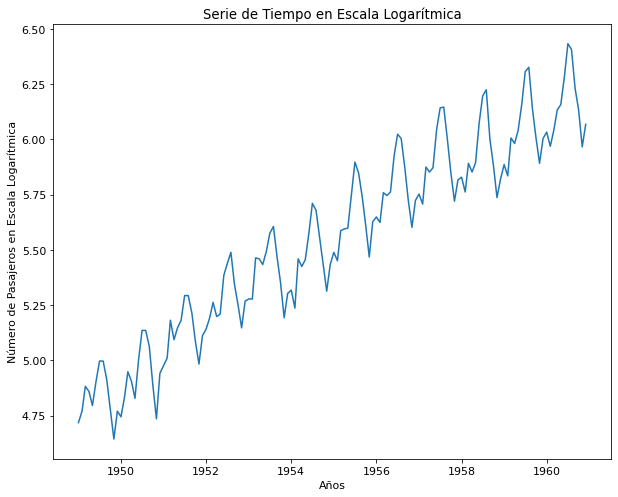

In [7]:
#Transformación logarítmica de la Serie
ts_log = np.log(ts)

#Gráfico del Resultado
plt.plot(ts_log);
plt.xlabel('Años')
plt.ylabel('Número de Pasajeros en Escala Logarítmica')
plt.title('Serie de Tiempo en Escala Logarítmica');

### Métodos para Series de Tiempo Estacionarias

Los métodos para realizar la **Estacionariedad** de una **Serie de Tiempo** se muestran en el siguiente diagrama:
<br>
<img src="./Imagenes/Estacional.png" style="width:796px;height:350px;" class="center">
<br>

#### Modelo de Diferencias
Se empleará el **Modelo de Diferencias** debido a la simplicidad del mismo. Para ello cuenta con el método `.shift()` de **Pandas**, el cual toma la primera diferencia desde la **Serie** original.

Se extrae el valor obtenido con este método de cada uno de los valores originales de la **Serie**, ambos en escala logarítmica:

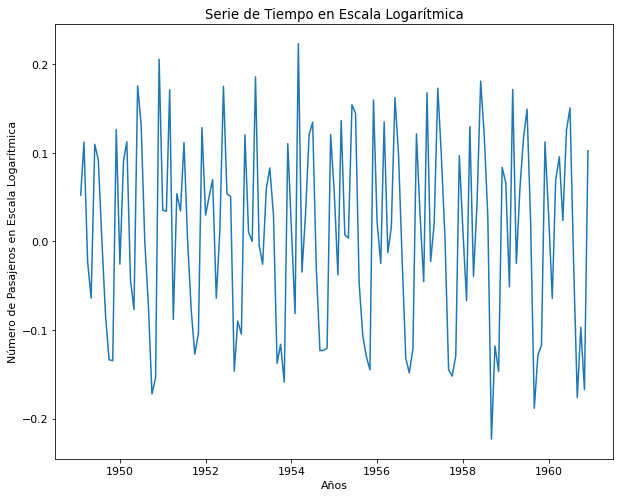

In [8]:
#Se toma la primera diferencia desde la Serie original
ts_log_diff = ts_log - ts_log.shift()

#Gráfico del Resultado
plt.plot(ts_log_diff);
plt.xlabel('Años')
plt.ylabel('Número de Pasajeros en Escala Logarítmica')
plt.title('Serie de Tiempo en Escala Logarítmica');

Ahora se hace una eliminación de los ***valores nulos*** que hayan resultado en este proceso, y se realiza la prueba de **Estacionariedad**:

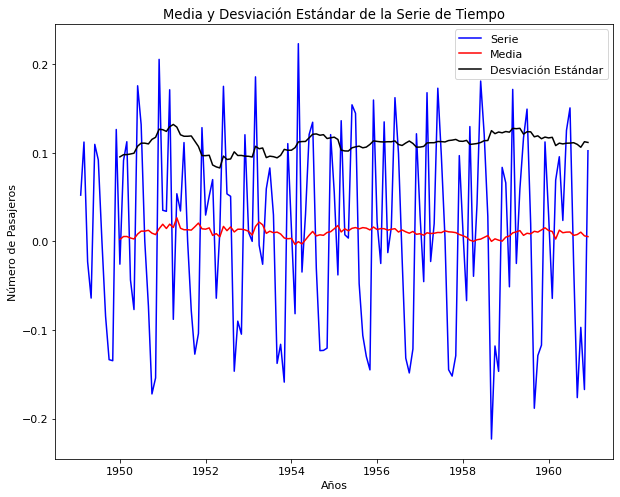

Resultados de la Prueba Dickey-Fuller de Estacionariedad:

Prueba Estadística          -2.717131
Valor-p                      0.071121
Número de Retardos          14.000000
Número de Observaciones    128.000000
Valor Crítico (1%)          -3.482501
Valor Crítico (5%)          -2.884398
Valor Crítico (10%)         -2.578960
dtype: float64


In [9]:
#Eliminación de los valores nulos
ts_log_diff.dropna(inplace = True)

#Prueba de Estacionariedad para la Serie
prueba_estacionariedad(ts_log_diff)

Al realizar la prueba de estacionariedad, es posible observar:
* La **media** y **desviación estándar** tienen una pequeña variación respecto al tiempo.
* El valor *Prueba Estadística* es menor que el valor del 10% de *Valor Crítico*, lo cual indica que hay un 90% de certeza de que esta **Serie** sea *Estacionaria*.

### Pronóstico de Series de Tiempo
Ahora que la serie ya es **Estacionaria**, se emplea un modelo estadístico conocido como **Modelo de Promedios Móviles Integrados Auto Regresivos** o **ARIMA** (***Auto Regressive Integrated Moving Average***) para realizar el pronóstico de valores.

El modelo **ARIMA** es similar a una *Regresión Lineal*, su predictor depende de tres parámetros (*p*, *d*, *q*), donde:

* *p*: Es el número de términos auto regresivos (AR). Por ejemplo, si *p = 3*, entonces el predictor de *x(t)* considera los elementos *x(t-1)*, *x(t-2)* y *x(t-3)*.
* *d*: Este es el número de diferencias a considerar.
* *q*: Es el número de términos para el promedio móvil (MA). Por ejemplo, si *q = 3*, entonces el predictor de *x(t)* considera los elementos *x(t-1)*, *x(t-2)* y *x(t-3)*.

Para determinar los valores *p* y *q*, se emplean dos funciones:

* **Función de Autocorrelación (ACF)**, la cual mide la correlación entre dos versiones consecutivas de la **Serie**. Por ejemplo, si el intérvalo a considerar es igual a 4, la **ACF** comparará la **Serie** en los tiempos *t1...t2* con las instancias *t1-4...t2-5*.
* **Función de Autocorrelación Parcial (PACF)**, la cual se emplea para medir el grado de asociación entre la **Serie** *x(t)* y *x(t-p)*.

#### Modelos ACF y PACF
El modelo **ARIMA**, así como los modelos **ACF** y **PACF** para determinar los valores *p* y *q* pueden ser determinados empleando la librería **StatsModels** de **Python**.


#### La Librería StatsModels
<br>
<img src="./Imagenes/Statsmodels_logo.png" style="width:549px;height:100px;" class="center">
<br>

**StatsModels** es una librería para **Python** cuyo principal propósito es brindar clases y funciones para la estimación de distintos modelos estadísticos, así como pruebas estadísticas y exploración de datos. Cada estimación que se obtiene incluye una lista de diversos resultados del análisis estadístico. Esta biblioteca se vincula directamente con la librería **NumPy** así como con **Matplotlib**. 

La documentación de **StatsModels** se puede encontrar a través [de esta liga](https://www.statsmodels.org/stable/index.html).

Se emplearán dos elementos al importar la librería, uno para el modelo **ARIMA** y otro para los modelos **ACF** y **PACF**:
```python
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf 
```
> Para determinar la **Función de Autocorrelación (ACF)** se emplea la función `acf(a,b)`, cuyos parámetros son:

* Parámetro a: Arreglo que contiene a la **Serie de Tiempo**.
* Parámetro b: Indica el número de retardos (`nlags = 12`) a ser empleados.

La documentación de la función `acf()` puede ser consultada [en esta liga](https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.acf.html).

> Para determinar la **Función de Autocorrelación Parcial (PACF)** se emplea la función `pacf(a,b,c)`, cuyos parámetros son:

* Parámetro a: Arreglo que contiene a la **Serie de Tiempo**.
* Parámetro b: Indica el número de retardos (`nlags = 12`) a ser empleados.
* Parámetro c: Indica el método a ser empleado (`method = 'ols'`), en este caso indica regresión de **Series de Tiempo**.

La documentación de la función `pacf()` puede ser consultada [en esta liga](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html).

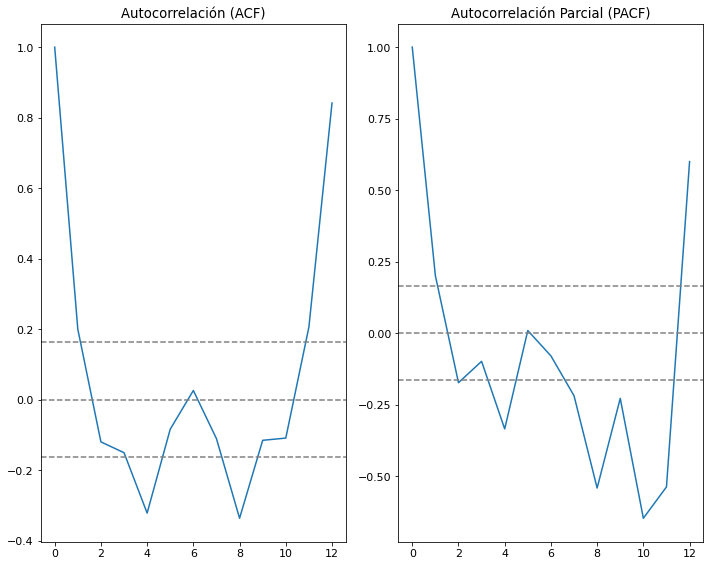

In [10]:
#Importación de librerías
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf  

#Importación de librería para evitar "Warning" en Jupyter Notebook
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Determinación de los Modelos ACF y PACF
lag_acf = acf(ts_log_diff, nlags = 12)
lag_pacf = pacf(ts_log_diff, nlags = 12, method = 'ols')

#Gráfico para ACF:    
plt.subplot(121);    
plt.plot(lag_acf);
plt.axhline(y = 0, linestyle='--', color='gray');
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray');
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray');
plt.title('Autocorrelación (ACF)');

#Gráfico para PACF:
plt.subplot(122);
plt.plot(lag_pacf);
plt.axhline(y = 0, linestyle='--', color='gray');
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray');
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray');
plt.title('Autocorrelación Parcial (PACF)');
plt.tight_layout();

Las líneas punteadas que aparecen en los gráficos arriba y abajo del valor *0.0* son los intérvalos de confianza, que se usan para determinar los valores *p* y *q*: 

* *p*: Es el valor donde la curva toca por vez primera el intérvalo superior de confianza en la **Función de Autocorrelación Parcial (PACF)**. En este caso es aproximadamente *p = 2*.
* *q*: Es el valor donde la curva toca por vez primera el intérvalo superior de confianza en la **Función de Autocorrelación (ACF)**. En este caso es aproximadamente *q = 2*.

En base a estos valores, se pueden generar tres modelos considerando los valores individuales o combinados, los cuales son:

1. El **Modelo Auto Regresivo** (**AR**, ***Auto Regressive***).
2. El **Modelo de Promedios Móviles** (**MA**, ***Moving Average***). 
3. El **Modelo de Promedios Móviles Integrados Auto Regresivos** (**ARIMA**, ***Auto Regressive Integrated Moving Average***).

Para cada uno de ellos se calcula un error conocido como **RSS** (***Residual Sum of Squares***, o **Suma Residual de Cuadrados**).

Adicionalmente, los tres modelos previamente descritos se pueden determinar a través del método `ARIMA(a,b)` de la librería **StatsModels** empleando dos argumentos:

1. El argumento a: Corresponde a la **Serie** que contiene a los datos en escala logarítmica.
2. El argumento b: Corresponde al orden del modelo, es decir, los valores *p*, *d* y *q* que se especifican por medio del parámetro `order = (p,d,q)`.

La documentación detallada del método `ARIMA()` puede ser consultada a través [de esta liga](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html).

Para llevar a cabo la aplicación del Modelo **ARIMA** se realizan los siguientes pasos:

1. Creación del Modelo **ARIMA** aplicando el método `ARIMA()` y especificando los parámetros correspondientes.
2. Acoplamiento del Modelo a los valores con *máxima verosimilitud* (*maximum likelihood*) empleando el método `.fit(disp = -1)`. 
3. Determinación del **Error RSS** entre la predicción y el valor de la **Serie** que fue transformada a un modelo **Estacionario**.

#### Modelo Auto Regresivo (AR)
Para el modelo **Modelo Auto Regresivo (AR)**, se emplearán los valores:
* *p = 2* 
* *d = 1* 
* *q = 0*

Esto es:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


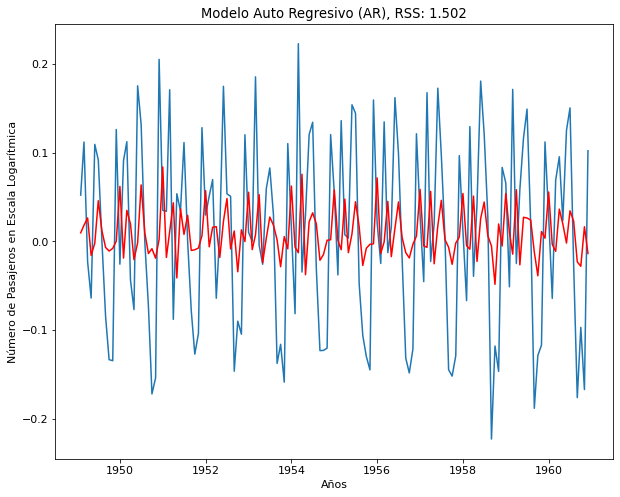

In [11]:
#Modelo Auto Regresivo (AR)
modelo_AR = ARIMA(ts_log, order = (2, 1, 0))
resulta_AR = modelo_AR.fit(disp = -1)
RSS_AR = sum((resulta_AR.fittedvalues - ts_log_diff)**2)

#Importación de librería para evitar "Warning" en Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

#Gráfico de la Serie de Tiempo
plt.plot(ts_log_diff);
plt.plot(resulta_AR.fittedvalues, color='red');
plt.title("Modelo Auto Regresivo (AR), RSS: %.3f"% RSS_AR);
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros en Escala Logarítmica');

#### Modelo de Promedios Móviles (MA)
Para el modelo **Modelo de Promedios Móviles (MA)**, se emplearán los valores:
* *p = 0* 
* *d = 1* 
* *q = 2*

Esto es:

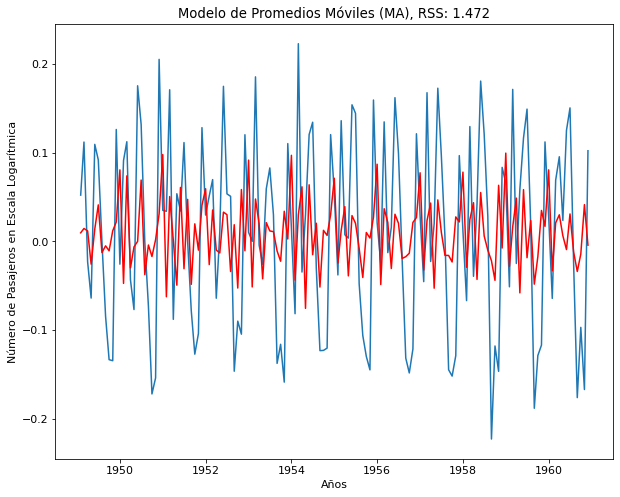

In [12]:
#Modelo de Promedios Móviles (MA)
modelo_MA = ARIMA(ts_log, order = (0, 1, 2))
resulta_MA = modelo_MA.fit(disp = -1)
RSS_MA = sum((resulta_MA.fittedvalues - ts_log_diff)**2)

#Importación de librería para evitar "Warning" en Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

#Gráfico de la Serie de Tiempo
plt.plot(ts_log_diff);
plt.plot(resulta_MA.fittedvalues, color='red');
plt.title("Modelo de Promedios Móviles (MA), RSS: %.3f"% RSS_MA);
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros en Escala Logarítmica');

#### Modelo de Promedios Móviles Integrados Auto Regresivos (ARIMA)
Para el modelo **Modelo de Promedios Móviles Integrados Auto Regresivos (ARIMA)**, se emplearán los valores:
* *p = 2* 
* *d = 1* 
* *q = 2*

Esto es:

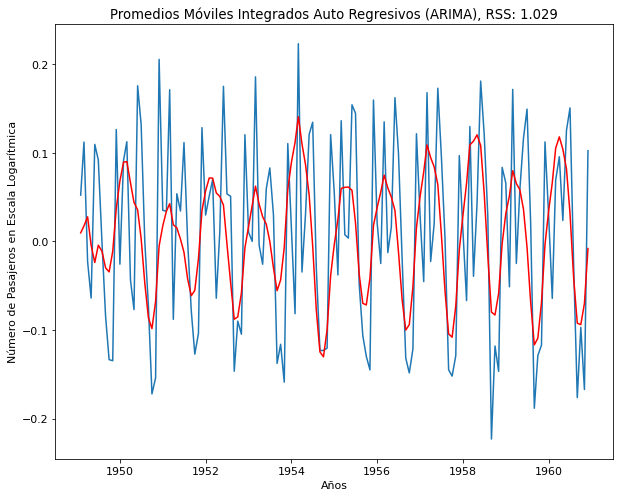

In [13]:
#Modelo de Promedios Móviles Integrados Auto Regresivos (ARIMA)
modelo_ARIMA = ARIMA(ts_log, order = (2, 1, 2))
resulta_ARIMA = modelo_ARIMA.fit(disp = -1)
RSS_ARIMA = sum((resulta_ARIMA.fittedvalues - ts_log_diff)**2)

#Importación de librería para evitar "Warning" en Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

#Gráfico de la Serie de Tiempo
plt.plot(ts_log_diff);
plt.plot(resulta_ARIMA.fittedvalues, color='red');
plt.title("Promedios Móviles Integrados Auto Regresivos (ARIMA), RSS: %.3f"% RSS_ARIMA);
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros en Escala Logarítmica');

Los valores del **Error RSS** generados por cada uno de los modelos son:

In [14]:
print("Valor RSS para AR = %.3f"% RSS_AR)
print("Valor RSS para MA = %.3f"% RSS_MA)
print("Valor RSS para ARIMA = %.3f"% RSS_ARIMA)

Valor RSS para AR = 1.502
Valor RSS para MA = 1.472
Valor RSS para ARIMA = 1.029


Es posible observar que el modelo **ARIMA** general el valor más bajo de **RSS**, por lo mismo es el más adecuado. 

#### Paso Final: Regresando a la Escala Original
Para regresar los valores a la escala original: 

1. Primero se deben obtener las predicciones y guardarlas en una **Serie**. Se notará que el primer mes hace falta *1949-01-01* debido a que se están empleando diferencias de 1 mes (*d = 1*). 
2. Posteriormente se determina la suma acumulada (método `.cumsum()`) y se agrega en una nueva **Serie**.
3. Se añaden esos valores a la **Serie** original. 
4. Se convierte a escala en tiempo la **Serie** obtenida.

In [15]:
#Paso 1: Asignación de las Predicciones a una Serie
predic_ARIMA_diff = pd.Series(resulta_ARIMA.fittedvalues, copy = True)

#Impresión de los Resultados
print(predic_ARIMA_diff.head())

Mes
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [19]:
#Paso 2: Asignación de la Suma Acumulada a una Serie
predic_ARIMA_diff_cumsum = predic_ARIMA_diff.cumsum()

#Impresión de los Resultados
print(predic_ARIMA_diff_cumsum.head())

Mes
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [20]:
#Paso 3: Adición de la Suma Acumulada a la Serie Original
predic_ARIMA_log = pd.Series(ts_log.loc[ts_log.index[0]], index = ts_log.index)
predic_ARIMA_log = predic_ARIMA_log.add(predic_ARIMA_diff_cumsum, fill_value = 0)

#Impresión de los Resultados
print(predic_ARIMA_log.head())

Mes
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64


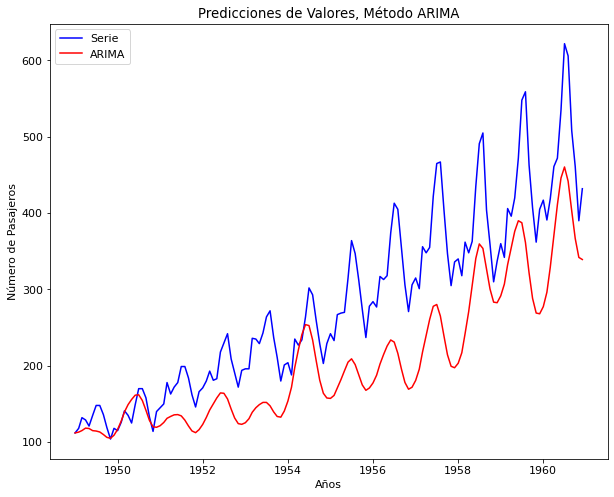

In [22]:
#Paso 4: Conversión al Dominio del Tiempo
predic_ARIMA = np.exp(predic_ARIMA_log)

#Impresión de los Resultados
plt.plot(ts, color='blue', label='Serie');
plt.plot(predic_ARIMA, color='red', label='ARIMA');
plt.legend(loc='best')
plt.title("Predicciones de Valores, Método ARIMA");
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros');
plt.show();

#### Pronóstico de Valores
Debido a que la **Serie** cuenta con la información de cada mes por 12 años (1949 a 1960), y suponiendo que se requiere hacer el pronóstico por los próximos 10 años, se emplea la fórmula siguiente:

$ (12 x 12) + (12 x 10) = 264 $

Esto es, *(12 valores x 12 años) + (12 valores por 10 años)*. Este valor será de utilidad para emplear el método `.predict()` de **StatsModels** para hacer la predicción de un rango de valores.

Adicionalmente, se puede emplear el método `.plot_predict()` de **StatsModels** para mostrar gráficamente el comportamiento de los valores pronosticados para la **Serie**. 

La documentación del método `.predict()` puede ser consultada [en esta liga](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.predict.html).

La documentación del método `.plot_predict()` puede ser consultada [en esta liga](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.plot_predict.html).

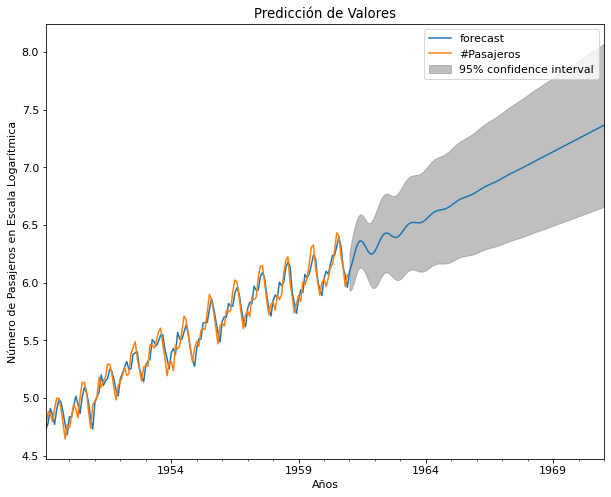

In [23]:
#Pronóstico de Valores para 10 Años
pronos_ARIMA = resulta_ARIMA.predict(1,264)

#Impresión de los Resultados
resulta_ARIMA.plot_predict(1,264)
plt.xlabel('Años')
plt.ylabel('Número de Pasajeros en Escala Logarítmica')
plt.title('Predicción de Valores')
plt.show();

En este caso, la variable `pronos_ARIMA` contiene el pronóstico de 120 valores (*12 valores por cada 10 años*) adicionales a los 144 valores con los que ya se contaba (*12 valores por 10 años*) para un total de 264 valores, los cuales pueden ser verificados aplicando el método `.shape` a la **Serie**:

In [25]:
#Impresión de los Resultados
print("El tamaño de la Serie es:", pronos_ARIMA.shape)

El tamaño de la Serie es: (264,)


El método `.predict()` proporciona el resultado en escala logarítmica. Para hacer la aproximación de los valores en su ***Escala Original***, es necesario realizar los 4 pasos descritos previamente pero considerando que cada valor pronosticado se deberá agregar a cada valor real previo.

El primer paso se puede omitir ya que el método `.predict()` proporciona una **Serie**. 

Sin embargo, se notará que a partir de *1961* y hasta *1971* hay una "*caída*" en lo valores, en realidad esto se debe a que no se cuenta con la información real de ese periodo de tiempo, y como se comentó previamente, cada uno de esos valores pronosticados se deben agregar al valor real previo para tener una estimación adecuada.

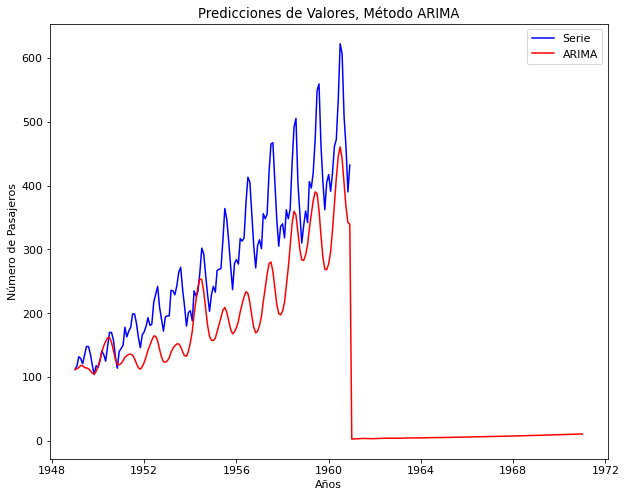

In [26]:
#Paso 2: Asignación de la Suma Acumulada a una Serie
predic_ARIMA_diff_cumsum = pronos_ARIMA.cumsum()

#Paso 3: Adición de la Suma Acumulada a la Serie Original
predic_ARIMA_log = pd.Series(ts_log.loc[ts_log.index[0]], index = ts_log.index)
predic_ARIMA_log = predic_ARIMA_log.add(predic_ARIMA_diff_cumsum, fill_value = 0)

#Paso 4: Conversión al Dominio del Tiempo
predic_ARIMA = np.exp(predic_ARIMA_log)

#Impresión de los Resultados
plt.plot(ts, color='blue', label='Serie');
plt.plot(predic_ARIMA, color='red', label='ARIMA');
plt.legend(loc='best')
plt.title("Predicciones de Valores, Método ARIMA");
plt.xlabel('Años');
plt.ylabel('Número de Pasajeros');
plt.show();

In [27]:
predic_ARIMA.tail(10)

1970-04-01    10.171546
1970-05-01    10.269104
1970-06-01    10.366988
1970-07-01    10.465514
1970-08-01    10.565053
1970-09-01    10.665930
1970-10-01    10.768345
1970-11-01    10.872330
1970-12-01    10.977761
1971-01-01    11.084407
dtype: float64

Los resultados pueden ser refinados para obtener un modelo más adecuado, pero por el momento se muestra a manera de introducción a un pronóstico de **Series de Tiempo**.

<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[h. Concatenación, Agrupación y Pivoteo](h.%20Concatenacion,%20Agrupacion%20y%20Pivoteo.ipynb)